In [ ]:
pip install soundfile

/usr/lib/python3/dist-packages/numpy/lib/function_base.py:2195: ComplexWarning: Casting complex values to real discards the imaginary part
  res = array(outputs, copy=False, subok=True, dtype=otypes[0])


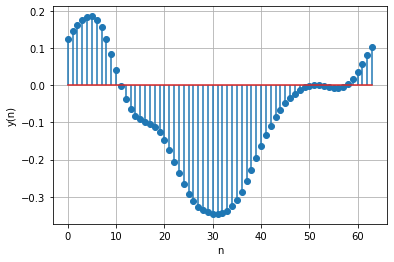

In [2]:
import soundfile as sf
import matplotlib.pyplot as plt
from scipy import signal
from scipy import vectorize as vec
import numpy as np


input_signal,fs = sf.read('Sound_Noise.wav') 

sampl_freq=fs

order=7 

cutoff_freq=4000.0  

Wn=2*cutoff_freq/sampl_freq  

# b and a are numerator and denominator polynomials respectively
b, a = signal.butter(order, Wn, 'low') 
output_signal = signal.filtfilt(b, a, input_signal)

# get partial fraction expansion
r, p, k = signal.residuez(b, a)
#number of terms of the impulse response
sz = 64
sz_lin = np.arange(sz)

dftmtx = np.fft.fft(np.eye(sz))
invmtx = np.linalg.inv(dftmtx)
def rp(x):
    return r@(p**x).T

rp_vec = vec(rp, otypes=['double'])

h1 = rp_vec(sz_lin)
k_add = np.pad(k, (0, sz - len(k)), 'constant', constant_values=(0,0))
h = h1 + k_add
H = h@dftmtx
X = input_signal[:sz]@dftmtx
Y = H*X
y = (Y@invmtx).real
plt.stem(np.arange(sz), y[:sz])
plt.xlabel('n')
plt.ylabel('y(n)')
plt.grid()
plt.plot()
plt.show()